# Universidad Politécnica de Yucatán
![UPY logo](http://mi-escuelamx.com/aspirantes_registro_upy/Imagenes/logoEncabezado.png)
### Data Engineering
### Supervised Learning
### Student: Walter Roberto Vives Castro
### Regression Models - Unit 2 Project
### Study Case: Forest Fires Data Set

**Algorithms to be used:**
1. Multiple Linear Regression
2. Multiple Linear Regression with Regularization: Lasso
3. Multiple Linear Regression with Regularization: Ridge
4. Multiple Linear Regression with Regularization: ElasticNet Regression
5. Bayessian Regresion

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mnso
import pprint

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, cross_val_score, RepeatedKFold
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings("ignore")

## 1. Business/Problem Understanding
**Forest Fire Data Set (UCI Machine Learning Repository)**

  This dataset is public available for research.
  
  P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data. 
  In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence, 
  Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December, 
  Guimaraes, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9. 
  Available at: http://www.dsi.uminho.pt/~pcortez/fires.pdf
  
  Data Set retrieved from: [Forest_Fire_Data_Set](http://archive.ics.uci.edu/ml/datasets/Forest+Fires)
  
  **Relevant Information:**

   This is a very difficult regression task. It can be used to test regression methods. Also,
   it could be used to test outlier detection methods, since it is not clear how many outliers
   are there. Yet, the number of examples of fires with a large burned area is very small.

   Number of Instances: 517 

   Number of Attributes: 12 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

   Attribute information:

   For more information, read [Cortez and Morais, 2007].

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec" 
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform).
    
The dataset consists
of meteorological (and other data) from a northeast region of Portugal. **The
aim of this project is to predict the burned area of forest fires.**

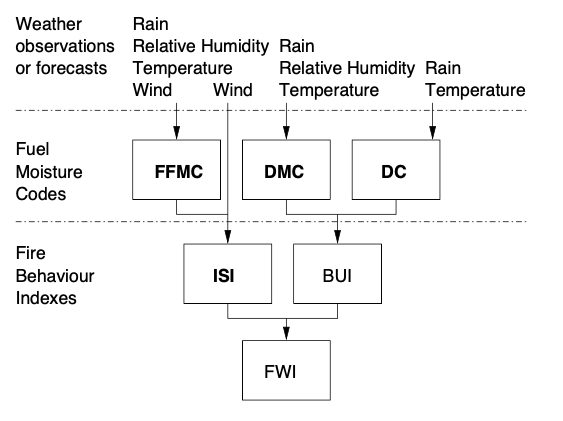
**FIGURE 1.** The Fire Weather Index structure. From A Data Mining Approach to Predict Forest Fires using Meteorological Data, by P. Cortez, A. Morais.



In [2]:
# Load dataset
df = pd.read_csv("forestfires.csv")
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


##  2. Data Exploration Analysis

In [3]:
# Statistical Description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


In [4]:
# Missing Values
df.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [5]:
# Sample of the dataset
df.sample(15)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
122,3,4,sep,sun,92.4,124.1,680.7,8.5,22.5,42,5.4,0.0,0.00
332,4,4,sep,sat,91.2,124.4,795.3,8.5,17.1,41,2.2,0.0,11.22
124,3,4,sep,fri,94.3,85.1,692.3,15.9,19.8,50,5.4,0.0,0.00
484,2,5,aug,sun,94.9,130.3,587.1,14.1,33.1,25,4.0,0.0,26.43
270,2,2,aug,tue,92.1,152.6,658.2,14.3,21.8,56,3.1,0.0,0.52
290,2,5,jul,sat,91.6,104.2,474.9,9.0,18.7,53,1.8,0.0,0.00
447,3,4,mar,wed,93.4,17.3,28.3,9.9,8.9,35,8.0,0.0,0.00
35,6,3,sep,tue,90.3,80.7,730.2,6.3,18.2,62,4.5,0.0,0.00
451,1,4,aug,fri,90.5,196.8,649.9,16.3,11.8,88,4.9,0.0,9.71
203,8,6,oct,wed,91.4,37.9,673.8,5.2,20.2,37,2.7,0.0,13.70


In [6]:
# Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


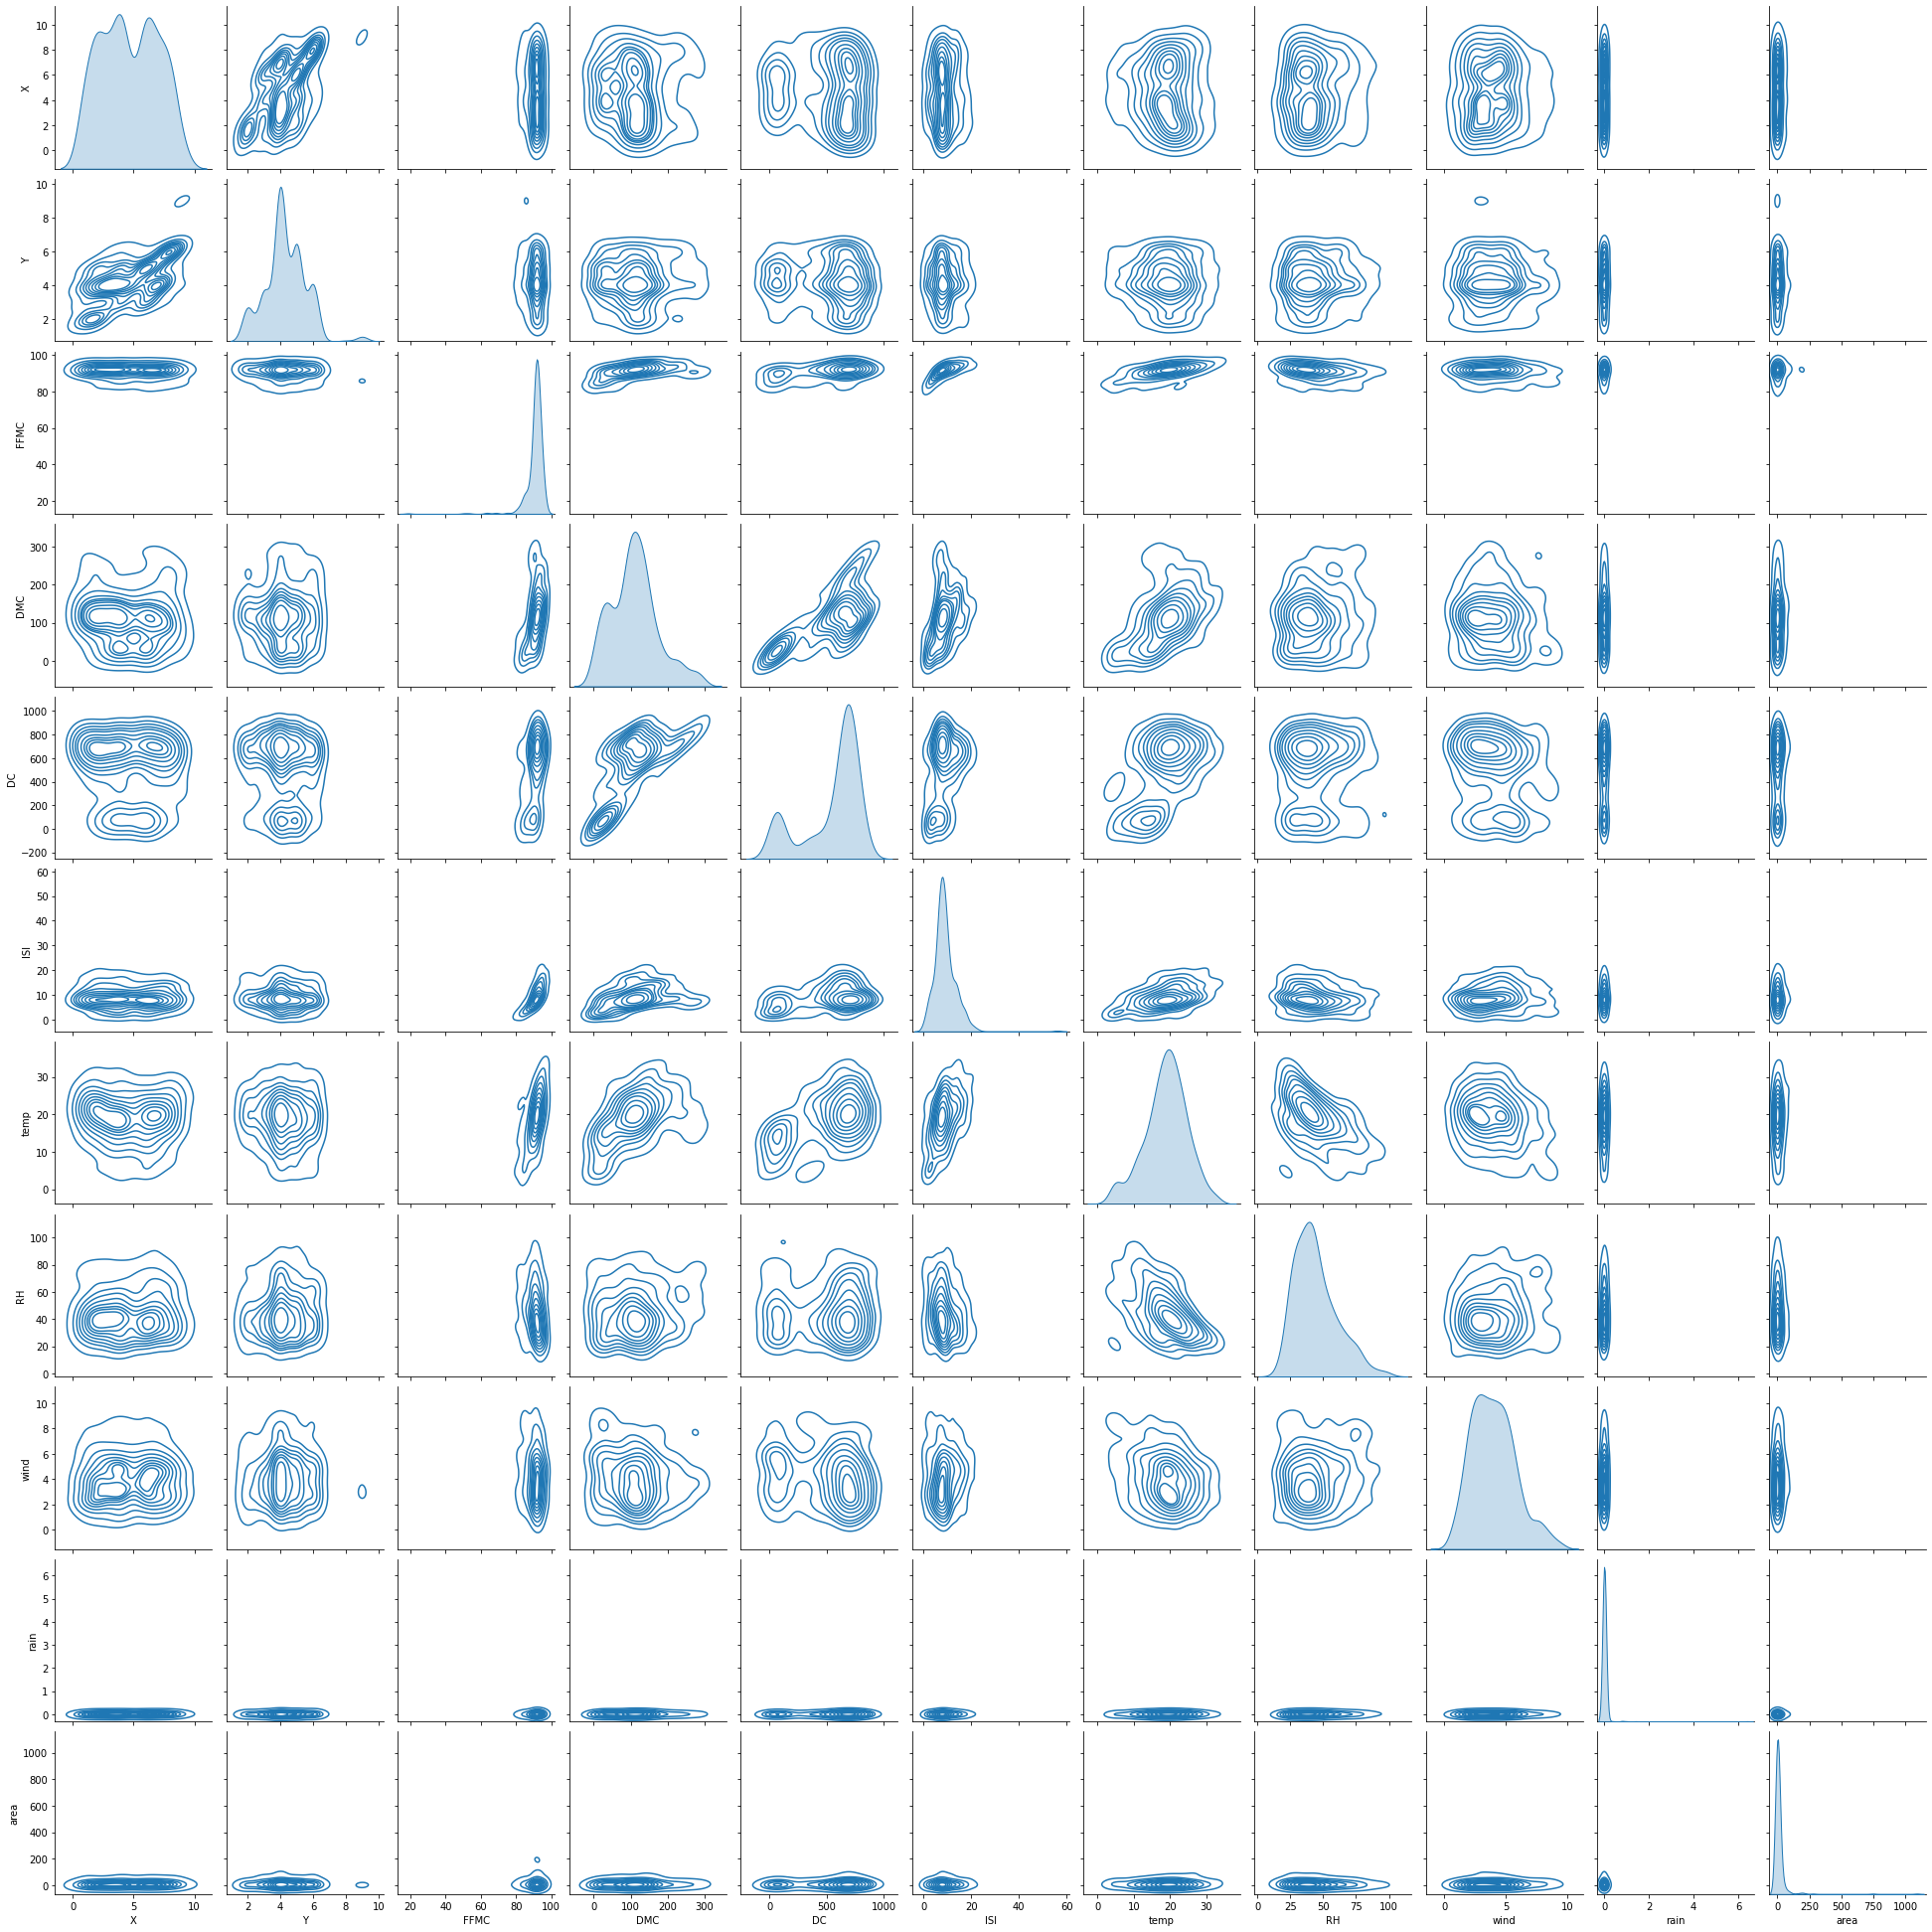

In [7]:
# Seaborn pairplot
sns.pairplot(df, kind="kde")
plt.show()

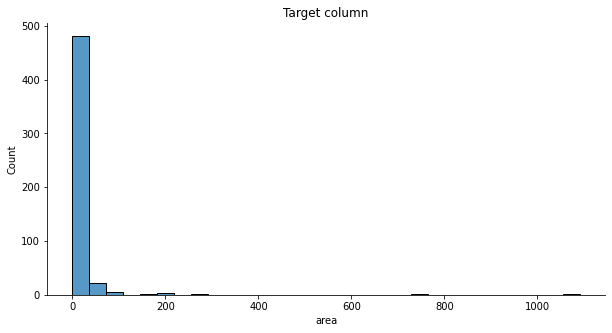

In [8]:
# target column
fig, ax = plt.subplots(figsize=(10,5))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title("Target column")
sns.histplot(df["area"], bins = 30)
plt.savefig("area.png")
plt.show()

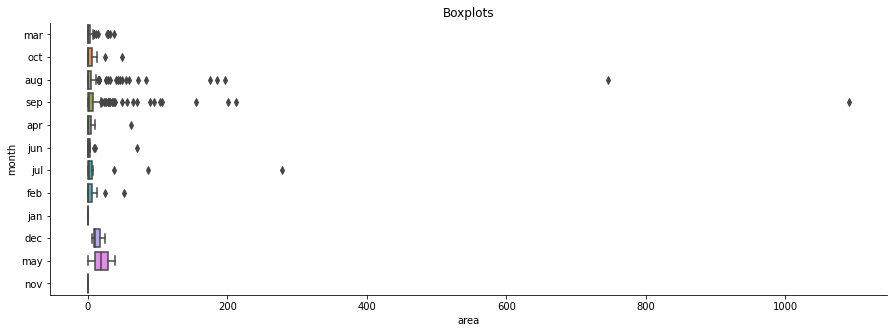

In [9]:
# Boxplot
fig, ax = plt.subplots(figsize=(15,5))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title("Boxplots")
sns.boxplot(y = df["month"], x=df["area"])
plt.show()

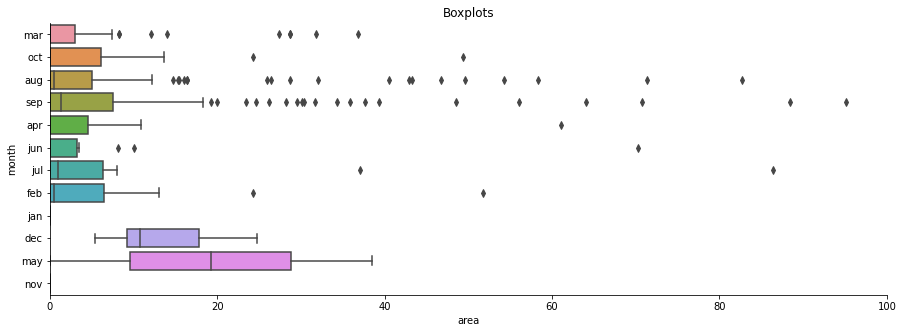

In [10]:
# Boxplot
fig, ax = plt.subplots(figsize=(15,5))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title("Boxplots")
plt.xlim(0,100)
sns.boxplot(y = df["month"], x=df["area"])
plt.show()

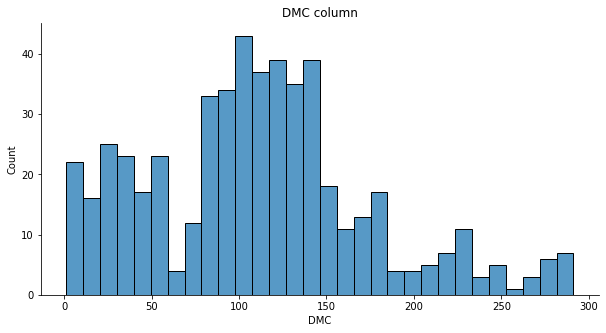

In [11]:
# DMC column
fig, ax = plt.subplots(figsize=(10,5))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
sns.histplot(df["DMC"], bins=30)
plt.title("DMC column")
plt.show()

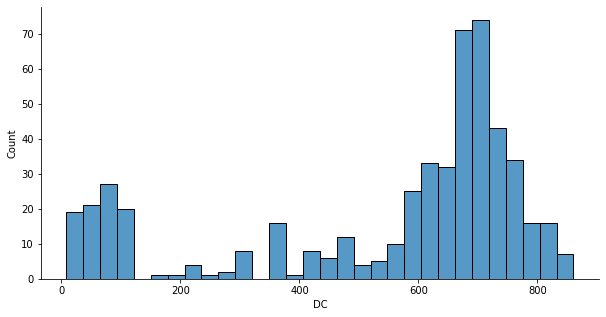

In [12]:
# DC column
fig, ax = plt.subplots(figsize=(10,5))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
sns.histplot(df["DC"], bins = 30)
plt.show()

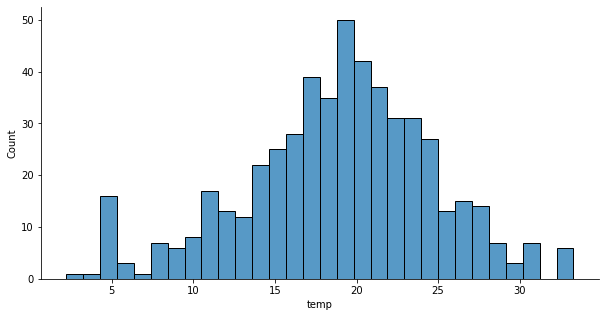

In [13]:
# temp column
fig, ax = plt.subplots(figsize=(10,5))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
sns.histplot(df["temp"], bins = 30)
plt.show()

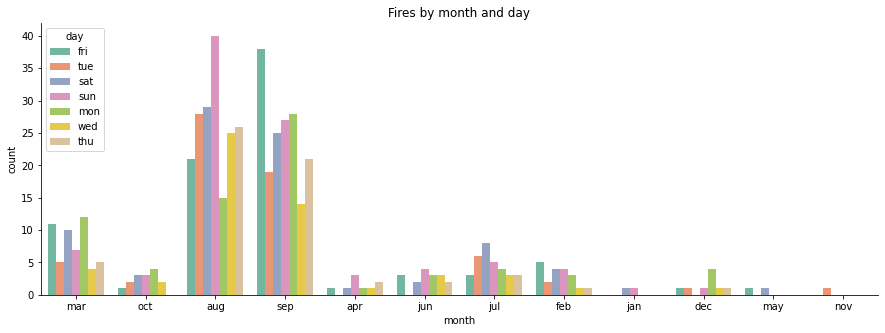

In [14]:
# countplot
fig, ax = plt.subplots(figsize=(15,5))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
sns.countplot(x="month", hue="day", data=df, palette = "Set2")
plt.title("Fires by month and day")
plt.savefig("Fires by month and day.png")
plt.show()

In [15]:
# Matrix correlation
corr_matrix = df.corr()

In [16]:
corr_matrix["area"].sort_values(ascending = False, key=lambda x: np.abs(x))

area    1.000000
temp    0.097844
RH     -0.075519
DMC     0.072994
X       0.063385
DC      0.049383
Y       0.044873
FFMC    0.040122
wind    0.012317
ISI     0.008258
rain   -0.007366
Name: area, dtype: float64

### Month column

In [17]:
for i in enumerate(df["month"].unique()):
    print(i)

(0, 'mar')
(1, 'oct')
(2, 'aug')
(3, 'sep')
(4, 'apr')
(5, 'jun')
(6, 'jul')
(7, 'feb')
(8, 'jan')
(9, 'dec')
(10, 'may')
(11, 'nov')


In [18]:
# Group by month
months = df.groupby(["month"])
months.first()

,X,Y,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
month,,,,,,,,,,,,
apr,6,4,sat,86.3,27.4,97.1,5.1,9.3,44,4.5,0.0,0.00
aug,8,6,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
dec,4,6,sun,84.4,27.2,353.5,6.8,4.8,57,8.5,0.0,8.98
feb,2,2,mon,84.0,9.3,34.0,2.1,13.9,40,5.4,0.0,0.00
jan,2,4,sat,82.1,3.7,9.3,2.9,5.3,78,3.1,0.0,0.00
jul,4,4,tue,79.5,60.6,366.7,1.5,23.3,37,3.1,0.0,0.00
jun,7,4,sun,94.3,96.3,200.0,56.1,21.0,44,4.5,0.0,0.00
mar,7,5,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
may,6,5,sat,85.1,28.0,113.8,3.5,11.3,94,4.9,0.0,0.00


In [19]:
# Monthy Frequency of Fires
total_months = list(df.groupby(["month"])["month"].count().items())
total_months = sorted(total_months, key=lambda x:x[1], reverse=True)
for i in total_months:
    print(i)

('aug', 184)
('sep', 172)
('mar', 54)
('jul', 32)
('feb', 20)
('jun', 17)
('oct', 15)
('apr', 9)
('dec', 9)
('jan', 2)
('may', 2)
('nov', 1)


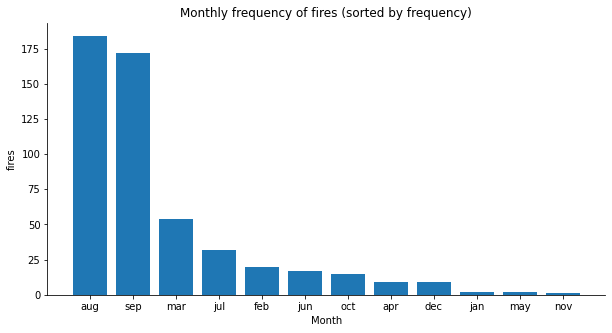

In [20]:
# Monthly frequency of fires (sorted by frequency) plot
months = list(zip(*total_months))[0]
total = list(zip(*total_months))[1]
fig, ax = plt.subplots(figsize=(10,5))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xlabel("Month")
plt.ylabel('fires')
plt.title("Monthly frequency of fires (sorted by frequency)")
plt.bar(months, total)

plt.show()

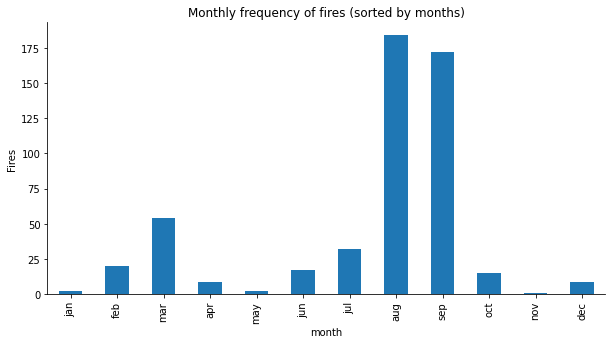

In [21]:
# Monthly frequency of fires (sorted by months) plot
month_list = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
plt.subplots(1,figsize=(10,5))
ax = plt.axes()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xlabel("Months")
plt.ylabel('Fires')
plt.title("Monthly frequency of fires (sorted by months)")
df.groupby("month")["month"].count().reindex(month_list).plot.bar()
plt.savefig("Monthly frequenct of fires.png")
plt.show()

It can be notice that the most of the fires are in the weekend, this open the idea that most of the fire are made by humans.

### day column

In [22]:
# unique days
for i in enumerate(df["day"].unique()):
    print(i)

(0, 'fri')
(1, 'tue')
(2, 'sat')
(3, 'sun')
(4, 'mon')
(5, 'wed')
(6, 'thu')


In [23]:
# Group by day
df.groupby("day")["day"].count()

day
fri    85
mon    74
sat    84
sun    95
thu    61
tue    64
wed    54
Name: day, dtype: int64

In [24]:
# Group by day sorted
days = df.groupby("day")["day"].count().items()
sort = list(sorted(days, key = lambda x: x[1], reverse = True))
for i in sort:
    print(i)

('sun', 95)
('fri', 85)
('sat', 84)
('mon', 74)
('tue', 64)
('thu', 61)
('wed', 54)


In [25]:
# groupby day
d = df.groupby("day")
d.first()

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
day,,,,,,,,,,,,
fri,7,5,mar,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
mon,8,6,aug,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
sat,7,4,oct,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
sun,8,6,mar,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
thu,4,4,sep,92.9,137.0,706.4,9.2,20.8,17,1.3,0.0,0.0
tue,7,4,oct,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
wed,6,5,sep,92.9,133.3,699.6,9.2,26.4,21,4.5,0.0,0.0


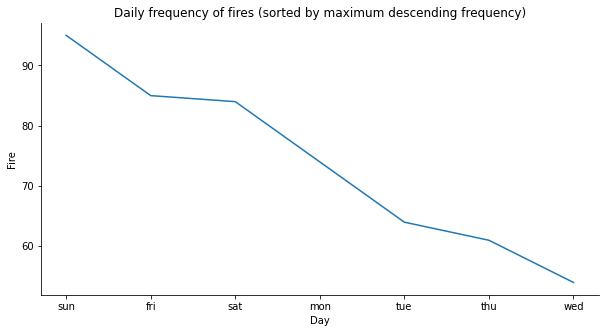

In [26]:
# daily frequency of fires (sorted by maximum descending frequency)
day_tuple = sorted(list(df.groupby("day")["day"].count().items()), key = lambda x: x[1], reverse = True)
day_x = list(zip(*day_tuple))[0]
day_frequency = list(zip(*day_tuple))[1]
plt.subplots(1,figsize=(10,5))
ax = plt.axes()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xlabel("Day")
plt.ylabel("Fire")
plt.title("Daily frequency of fires (sorted by maximum descending frequency)")
plt.plot(day_x, day_frequency)

plt.show()

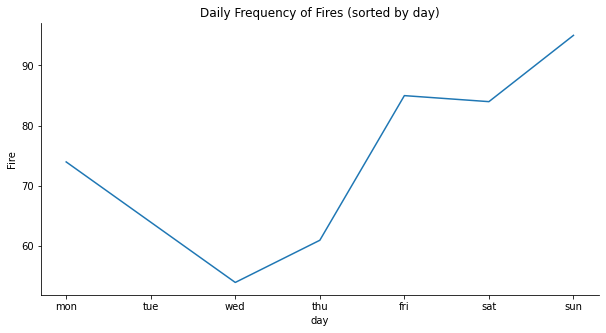

In [27]:
# daily frequency of fires (sorted by day frequency)
day_list = ["mon", "tue", "wed", "thu", "fri", "sat", "sun"]
plt.subplots(1, figsize=(10,5))
ax = plt.axes()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title("Daily Frequency of Fires (sorted by day)")
plt.xlabel("Day")
plt.ylabel("Fire")
df.groupby("day")["day"].count().reindex(day_list).plot()
plt.savefig("Daily frequency of fires.png")

plt.show()

It can be notice that the most of the fires are in the weekend, this open the idea that most of the fire are made by humans.

#### Outliers

In [28]:
# Z-Score, z > 3, it's an outlier.
dfx = df.loc[:, df.dtypes != object]
threshold = 3
for column in dfx.columns:
    mean = np.mean(dfx[column])
    std = np.std(dfx[column])
    outlier = []
    for i in dfx[column]:
        z = (i-mean)/std
        if z > threshold:
            outlier.append(i)
    print("outliers in {} column: {}".format(column, outlier))

outliers in X column: []
outliers in Y column: [9, 9, 9, 9, 9, 8, 9]
outliers in FFMC column: []
outliers in DMC column: []
outliers in DC column: []
outliers in ISI column: [56.1, 22.7]
outliers in temp column: []
outliers in RH column: [97, 99, 96, 94, 100]
outliers in wind column: [9.4, 9.4, 9.4, 9.4]
outliers in rain column: [1.0, 6.4, 1.4]
outliers in area column: [212.88, 1090.84, 746.28, 278.53]


Given that in the dataset there is not enough records, the outliers will not be deleted. Maybe the outliers of the area column can be removed in order to improve our model.

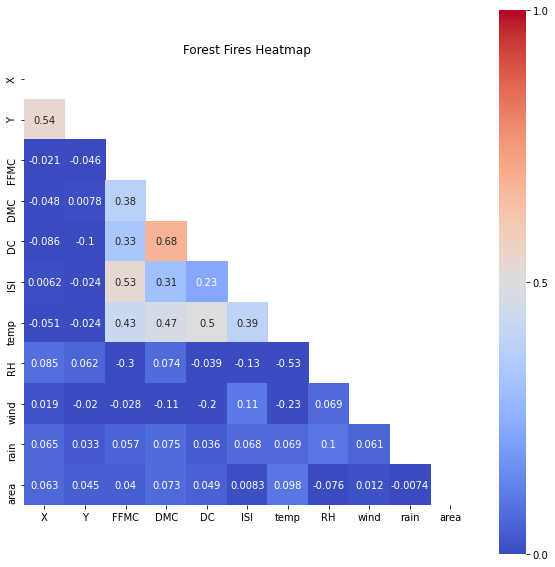

In [29]:
# Mask to hide upper triangle
mask = np.zeros_like(corr_matrix, dtype = bool)
mask[np.triu_indices_from(mask)] = True

# Correlation Heatmap
fig, ax = plt.subplots(figsize=(10,10))
heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      cmap = "coolwarm",
                      cbar_kws = {"ticks":[-1, -0.5, 0, 0.5, 1]},
                      vmin = 0,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size":10})
plt.title("Forest Fires Heatmap")
plt.savefig("Forest Fires Heatmap.png")
plt.show()

It can be notice that the `FFMC` feature has a important correlation with `ISI` given that FFMC is a branch of ISI in the FWI System.

There is a clearly correlation between `DMC`& `DC` features. The reason is that these variables are in the same level in the FWI System. Therefore, this is a warning for us to avoid using both in our model, this can cause Multicollinearity and affect our model.

The features `DMC`& `DC`have correlation with `temp` feature given that in DMC (Duff Moisture Code) are taking into account three variables: rain, temperature and realtive humidity, and in `DC` (Drought Code) the variables are rain and temperature.

To determine which features are the best, They have to be compared individually with the target feature and choose the ones that have high correlation. However, the analysis of each independient variable has to be done to avoid multicollinearity.

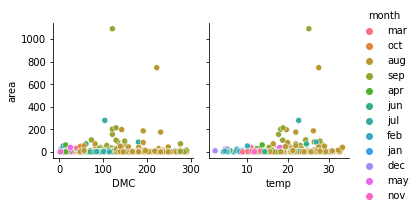

In [30]:
sns.pairplot(df,x_vars = ['DMC', 'temp'],
                        y_vars = ['area'], 
                        hue = 'month')
plt.show()

### 3. Data Preparation

In [31]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [32]:
# Standardize features (input variables) by removing the mean and scaling to unit variance
scaler = StandardScaler()

In [33]:
df1 = df.loc[:,df.dtypes != object]
df1.loc[:,"X":"rain"] = scaler.fit_transform(df1.loc[:,"X":"rain"])
df1.head(3)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1.008313,0.569860,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,0.0
1,1.008313,-0.244001,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,0.0
2,1.008313,-0.244001,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,0.0


In [34]:
# Log transform
df1["log_area"] = np.log(df1["area"] + 1)
df1.head(3)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,log_area
0,1.008313,0.569860,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,0.0,0.0
1,1.008313,-0.244001,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,0.0,0.0
2,1.008313,-0.244001,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,0.0,0.0


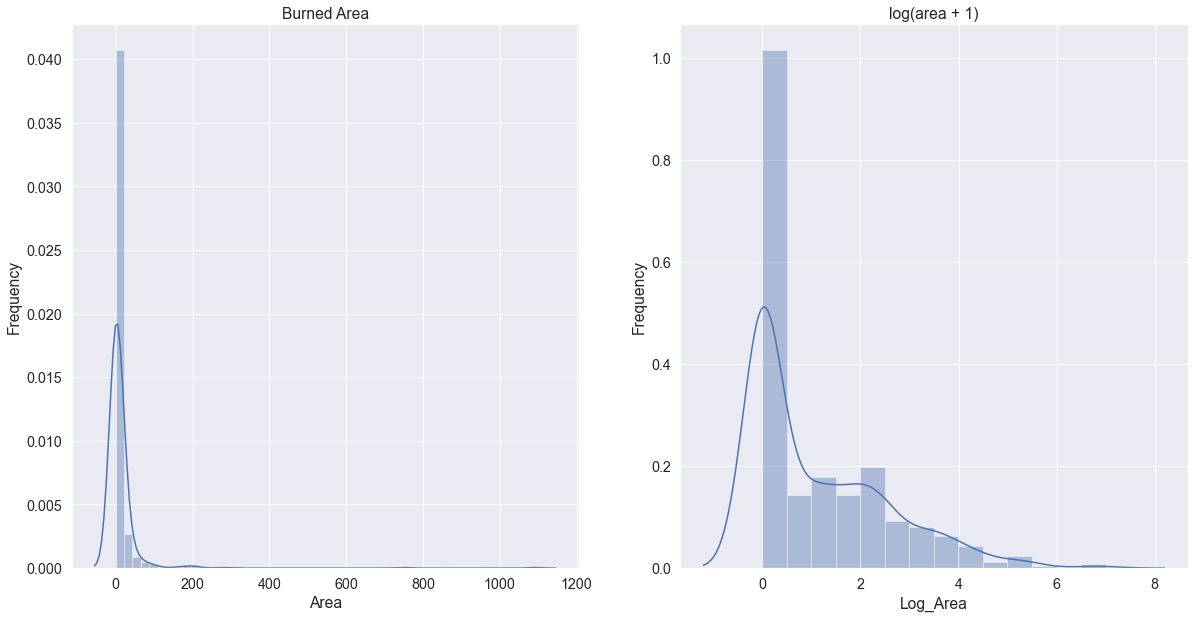

In [35]:
# Compare the distribution between area column, after and before transformation
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(font_scale = 1.3)
fig, ax = plt.subplots(1,2)

# Burned area
area1 = sns.distplot(df1["area"], ax = ax[0])

# log(area + 1)
area2 = sns.distplot(df1["log_area"], ax = ax[1])

area1.set(title = "Burned Area", 
          xlabel = "Area",
          ylabel = "Frequency")
area2.set(title = "log(area + 1)",
          xlabel = "Log_Area",
          ylabel = "Frequency")
plt.savefig("area_log.png")
plt.show()

In [36]:
# drop area column
df1.drop("area", axis = 1, inplace = True)

In [37]:
# Rename
df1 = df1.rename(columns = {"log_area":"area"})

In [38]:
# Separate data and target
df1_data = df1.loc[:,"X":"rain"]
df1_target = df1["area"]

In [39]:
# Train and Test Set
data_train, data_test, target_train, target_test = train_test_split(df1_data,
                                                                    df1_target,
                                                                    test_size = 0.20,
                                                                    random_state = 42)

In [40]:
# Shape
print("Train: ", data_train.shape, target_train.shape)
print("Test: ", data_test.shape, target_test.shape)

Train:  (413, 10) (413,)
Test:  (104, 10) (104,)


### Feaure Selection (Filter)

In [41]:
# Univariate Feature Selection
feature_selector = SelectKBest(score_func=f_regression, k = 4)
feature_selector.fit(data_train, target_train)

SelectKBest(k=4, score_func=<function f_regression at 0x1256ca1f0>)

In [42]:
data_train_filtered = feature_selector.transform(data_train)
data_test_filtered = feature_selector.transform(data_test)

In [43]:
print("Train Original:    ", data_train.shape)
print("Test Original:     ", data_test.shape)
print("Train Transformado:", data_train_filtered.shape)
print("Test Transformado: ", data_test_filtered.shape)

Train Original:     (413, 10)
Test Original:      (104, 10)
Train Transformado: (413, 4)
Test Transformado:  (104, 4)


#### Scores

In [44]:
# scores
feature_selector.scores_

array([2.4762205 , 1.09940656, 1.50356209, 3.67363947, 1.79029909,
       0.00712166, 0.60310307, 0.22223779, 0.38984529, 0.42659862])

In [45]:
for i in range(len(feature_selector.scores_)):
    print("{:4s}: {:10f}".format(df1.columns[i], feature_selector.scores_[i]))

X   :   2.476221
Y   :   1.099407
FFMC:   1.503562
DMC :   3.673639
DC  :   1.790299
ISI :   0.007122
temp:   0.603103
RH  :   0.222238
wind:   0.389845
rain:   0.426599


In [46]:
data_train_filtered.shape[1]

4

#### Selected Features

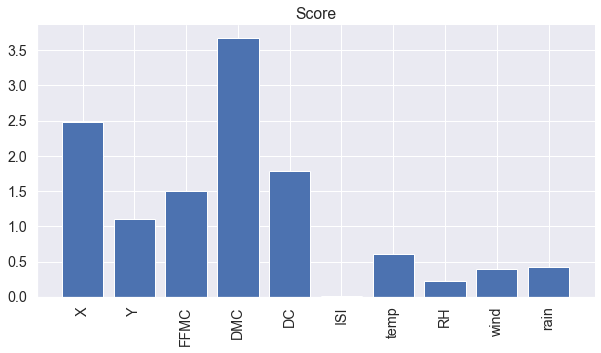

In [47]:
# Score plot of each column
plt.subplots(1, figsize=(10,5))
ax = plt.axes()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title("Score")
plt.xticks(rotation=90)
plt.bar([df1.columns[i] for i in range(len(feature_selector.scores_))], feature_selector.scores_)
plt.savefig("feature_selection_score.png")
plt.show()

In [48]:
# Names of the selected features
print("Column index: ",feature_selector.get_support(indices=True))

vector_names = list(df1.columns[feature_selector.get_support(indices=True)])
print(vector_names)

Column index:  [0 2 3 4]
['X', 'FFMC', 'DMC', 'DC']


The scores are made in two steps: 
1. The correlation between each regressor and the target. 
2. It is converted to an F score then to a p-value

It can be notice that 5 of 10 are less than 1 and 5 of 10 are greater or equal than 1. In our univariate feature selection, using SelectKBest from sklearn, It was stablished k = 4.

Looking the results, It can be noticed that the selected columns are `X`, `FFMC`, `DMC`, `DC`.

I consider that to improve the performance of the model the geographical vector `X` (also Y but it was not selected) should not be used in our model, given that the feature do not apport to the model.

For educational purpose, in the model will be take into account the `X` feature and will be compared with the model without it.


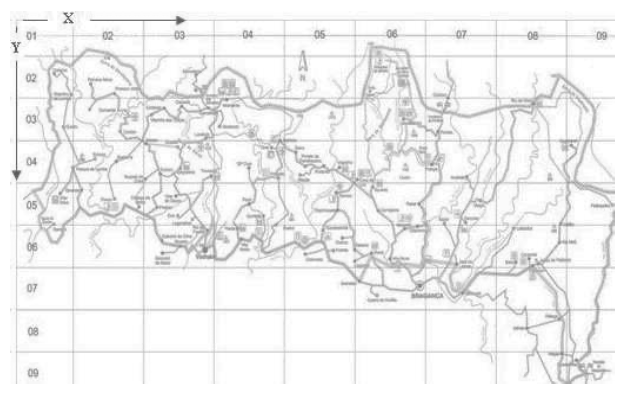

**Figure 2**. The map of the Montesinho natural park. From A Data Mining Approach to Predict Forest Fires using Meteorological Data, by P. Cortez, A. Morais.

#### Dependient variable vs Independient Analysis

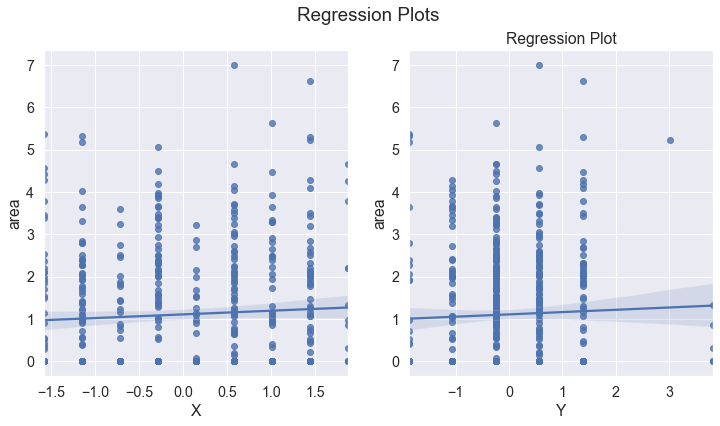

In [49]:
# X & area
# Y & area
fig, ax = plt.subplots(1,2, figsize = (12,6)) 
plt.title("Regression Plot")
sns.regplot(x="X", y="area", data=df1, ax = ax[0])
sns.regplot(x="Y", y="area", data=df1, ax = ax[1])
fig.suptitle('Regression Plots')
plt.savefig("X_Y_regression_area.png")
plt.show()

In [50]:
# Pearson's correlation coefficient (covariance(X, Y) / (stdv(X) * stdv(Y)))
corr_a, _ = pearsonr(df1["X"],df1["area"])
corr_b, _ = pearsonr(df1["Y"],df1["area"])
print("Pearson's correlation coefficient of X & area:\n", corr_a)
print("Pearson's correlation coefficient of Y & area:\n", corr_b)

Pearson's correlation coefficient of X & area:
 0.061994908322465014
Pearson's correlation coefficient of Y & area:
 0.03883821346536808


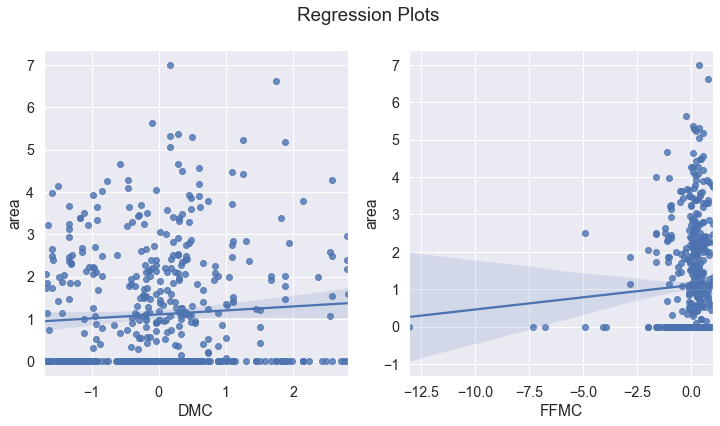

In [51]:
#  DMC & area
# FFMC & area 
fig, ax = plt.subplots(1,2, figsize = (12,6)) 
sns.regplot(x = "DMC", y = "area", data = df1, ax = ax[0])
sns.regplot(x = "FFMC", y = "area", data = df1, ax = ax[1])
fig.suptitle('Regression Plots')
plt.savefig("Regression_plot_DMC&FFMC.png")
plt.show()

In [52]:

# Pearson's correlation coefficient (covariance(X, Y) / (stdv(X) * stdv(Y)))
corr1, _ = pearsonr(df1["DMC"],df1["area"])
corr2, _ = pearsonr(df1["FFMC"],df1["area"])
print("Pearson's correlation coefficient of DMC & area:\n", corr1)
print("\nPearson's correlation coefficient of FFMC & area:\n ", corr2)



Pearson's correlation coefficient of DMC & area:
 0.06715273981504079

Pearson's correlation coefficient of FFMC & area:
  0.046798563676477424


Even though that `DMC` & `FFMC` had the best scores using f_regression. There is not a clearly correlation with our dependient variable `area`.
It can be a problem in our model.

#### Independient variables Analysis

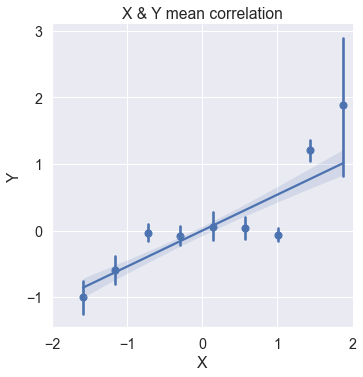

In [53]:
sns.lmplot(x="X", y="Y", data=df1, x_estimator=np.mean)
plt.title("X & Y mean correlation")
plt.xlim(-2,2)
plt.savefig("X&Y_mean correlation.png")

plt.show()

It can be notice that there exist a possible correlation given their mean of the features `X`& `Y`. It means, that both variables should not be taken into account in our model.


Pearson's correlation coefficient of DMC & DC:
  0.6821916119833171


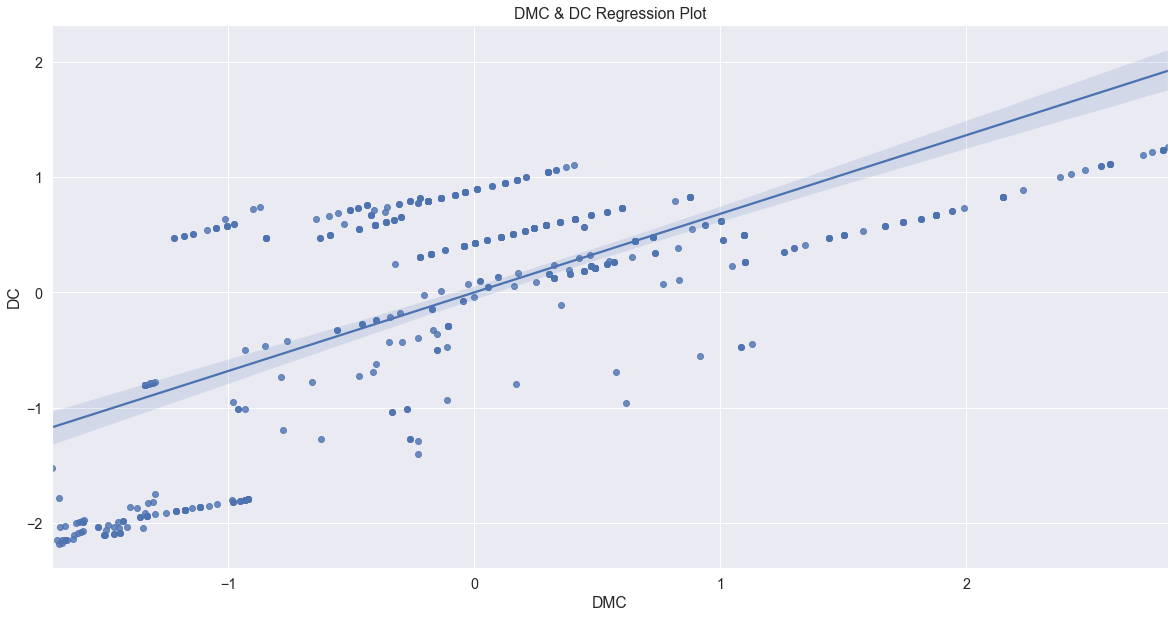

In [54]:
sns.regplot(x="DMC", y="DC", data=df1)
corr, _ =  pearsonr(df1["DMC"],df1["DC"])
plt.title("DMC & DC Regression Plot")
print("\nPearson's correlation coefficient of DMC & DC:\n ", corr)
plt.savefig("Pearson_corr_DMC_DC.png")
plt.show()

The forest Fire Weather Index (FWI) Canadian system for ratings says that DMC AND DC are in the same classification level (Fuel Moisture Codes). For that reason, there is probability that those features are correlated.

Seeing the result of Pearson's correlation coeficient of those features, it can be concluded that those features that are in the same level (FWI System) are highly correlated.

- If:
    - Negative correlation: -1 <= ρ < 0 
    - Neutral correlation: ρ = 0
    - Positive correlation: 0 < ρ <= 1 

Our ρ is = 0.682. Therefore, the correlation is strong enough to say that there is a correlation.

For that reason, there must be taken only one feature in our model to avoid **Multicollinearity**. In other words, there could be redundant inforrmation. The precision of the estimate coefficients can be reduced given that they are sensitive to small changes.

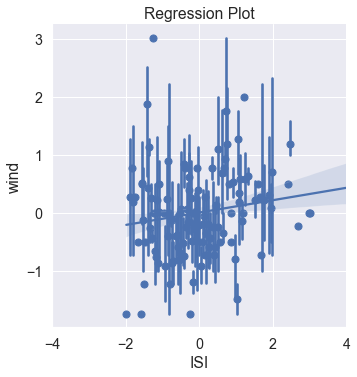

In [55]:
sns.lmplot(x="ISI", y="wind", data=df1, x_estimator=np.mean)
plt.title("Regression Plot")
plt.savefig("Regression_plot_wind_ISI.png")
plt.xlim(-4,4)
plt.show()

In [56]:
corr_w, _ =  pearsonr(df1["wind"],df1["ISI"])
print("\nPearson's correlation coefficient of DMC & DC:\n ", corr_w)


Pearson's correlation coefficient of DMC & DC:
  0.10682588792335049


The features `wind` and `ISI`have zero/neutral correlation. Even though that in `ISI`feature the `wind` is included. Maybe removing the outliers can improve that correlation.

#### New Selected Features

In [57]:
# Names of the selected features
print("Column index: ",feature_selector.get_support(indices=True))

vector_names = list(df1.columns[feature_selector.get_support(indices=True)])
print(vector_names)

Column index:  [0 2 3 4]
['X', 'FFMC', 'DMC', 'DC']


The features selected were`['X', 'FFMC', 'DMC', 'DC']`. However, in order to improve the model, the `DC` will not be take into account in our model given that has high correlation with `DMC`feature and it can cause multicollinearity.

In [58]:
# Original data_train & data_test without feature selection
print("Train Original:    ", data_train.shape)
print("Test Original:     ", data_test.shape)

Train Original:     (413, 10)
Test Original:      (104, 10)


In [59]:
# data_train_filtered & data_test_fitered (k = 4)
print("Train Transformado:", data_train_filtered.shape)
print("Test Transformado: ", data_test_filtered.shape)

Train Transformado: (413, 4)
Test Transformado:  (104, 4)


In [60]:
# Dataset copy 
df2 = df1.copy()

# Separate data and target
df2_data = df2[["X", "FFMC", "DMC"]]
df2_target = df2[["area"]]

# Train & Test Set
data_train, data_test, target_train, target_test = train_test_split(df2_data,
                                                                    df2_target,
                                                                    test_size = 0.20,
                                                                    random_state = 42)

In [61]:
# Shape
print("Data train: ", data_train.shape)
print("Data test: ", data_test.shape)

Data train:  (413, 3)
Data test:  (104, 3)


## 4. Model Prediction

### 1. Multiple Linear Regression

In [62]:
# Model Creation
linear_regression = LinearRegression()

# Model fit
linear_regression.fit(data_train, target_train)

LinearRegression()

In [63]:
intercept = linear_regression.intercept_
coefficients = linear_regression.coef_

print("w0 = {:5.2f}".format(intercept[0]))

for i in range(1, len(coefficients[0]) + 1):
    print("w{:d} = {:5.2f}".format(i, coefficients[0][i-1]))

w0 =  1.10
w1 =  0.11
w2 =  0.04
w3 =  0.11


In [64]:
# Model Prediction
y_pred = linear_regression.predict(data_test)

#### Model Evaluation

In [65]:
# Mean Square Error
MSE_sklearn = mean_squared_error(target_test, y_pred)

# RMSE
RMSE = np.sqrt(MSE_sklearn)

# R2
R2_sklearn = r2_score(target_test, y_pred)

# mae
MAE_sklearn = mae(target_test, y_pred)

Root Mean Square Error (RMSE) shows how far predictions fall from measured true values using Euclidean distance. It corresponds approximately to an estimate of the standard deviation.

In [66]:
print("MSE_sklearn = {:.3f}".format(MSE_sklearn))
print("MAE_sklearn = {:.3f}".format(MAE_sklearn))
print("RMSE_sklearn = {:.3f}".format(RMSE))
print("R2_sklearn = {:.3f}".format(R2_sklearn))

MSE_sklearn = 2.238
MAE_sklearn = 1.211
RMSE_sklearn = 1.496
R2_sklearn = -0.018


R_square: The ratio of the regression error against the total error tells you how much of the total error remains in your regression model.  Subtracting that ratio from 1.0 gives how much error you removed using the regression analysis.

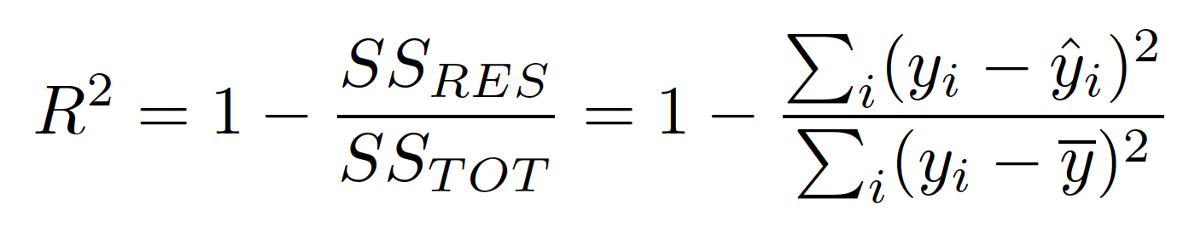

Our R square was **negative**, that means that our model is worst than using just the mean. In this case is better use the mean value.

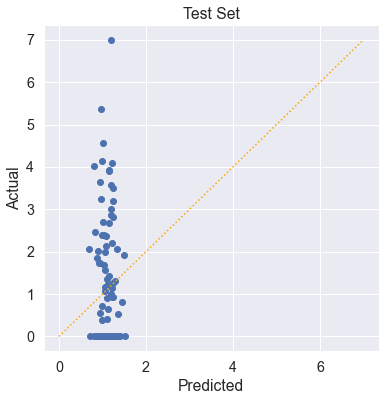

In [67]:
# Prediction vs Actual Value
fig, ax = plt.subplots(figsize = (6,6)) 
ax.set_title("Test Set")
ax.scatter(y_pred, target_test)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], ":", color = 'orange')
plt.savefig("Predict_Actual_plot.png")

plt.show()

In [68]:
# KFold Object Creation
kf = KFold(n_splits=5)

# KFold Prediction
fire_target_prediction = cross_val_predict(linear_regression,
                                             df2,
                                             df2_target, 
                                             cv = kf)
# RMSE
rmse_cv = np.sqrt(mean_squared_error(fire_target_prediction, df2_target))
print("RMSE on 5-fold Cross Validation: {:.2f}".format(rmse_cv))

RMSE on 5-fold Cross Validation: 0.00


with the statistical method K-fold was obtained RME = 0.00. This means, that with the resampling, with k = 5 was obtained a better performance in our model.

In [69]:
# Mae Score
mae_score  = -cross_val_score(linear_regression,
                             df2,
                             df2_target,
                             scoring = 'neg_mean_absolute_error',
                             cv = 10,
                             verbose = 0)
rmse_score = -cross_val_score(linear_regression,
                             df2,
                             df2_target,
                             scoring = 'neg_root_mean_squared_error',
                             cv = 10,
                             verbose = 0)

In [70]:
rmse_score

array([1.20451161e-15, 7.27839827e-16, 6.24748558e-16, 1.10851367e-15,
       9.84824346e-16, 1.64951213e-15, 6.55244182e-16, 8.32689607e-16,
       2.10125131e-15, 1.96132978e-15])

In [71]:
mae_score

array([9.76338559e-16, 5.60153977e-16, 4.27814359e-16, 9.47959659e-16,
       7.62576145e-16, 1.34855583e-15, 5.36295216e-16, 5.02275040e-16,
       1.57642842e-15, 1.48642957e-15])

**Mean Absolute Error**
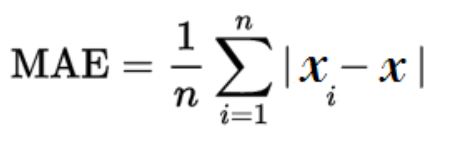

**Where:**

- n = the number of errors,
- Σ = summation symbol (which means “add them all up”),
- |xi – x| = the absolute errors.

**Root-Mean-Squared Deviation**
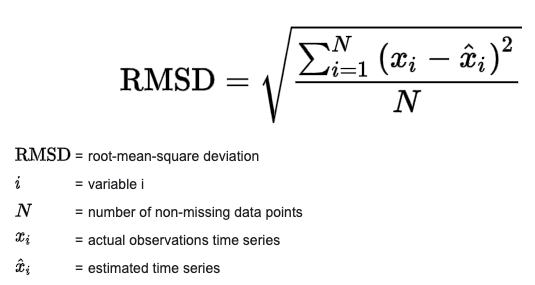

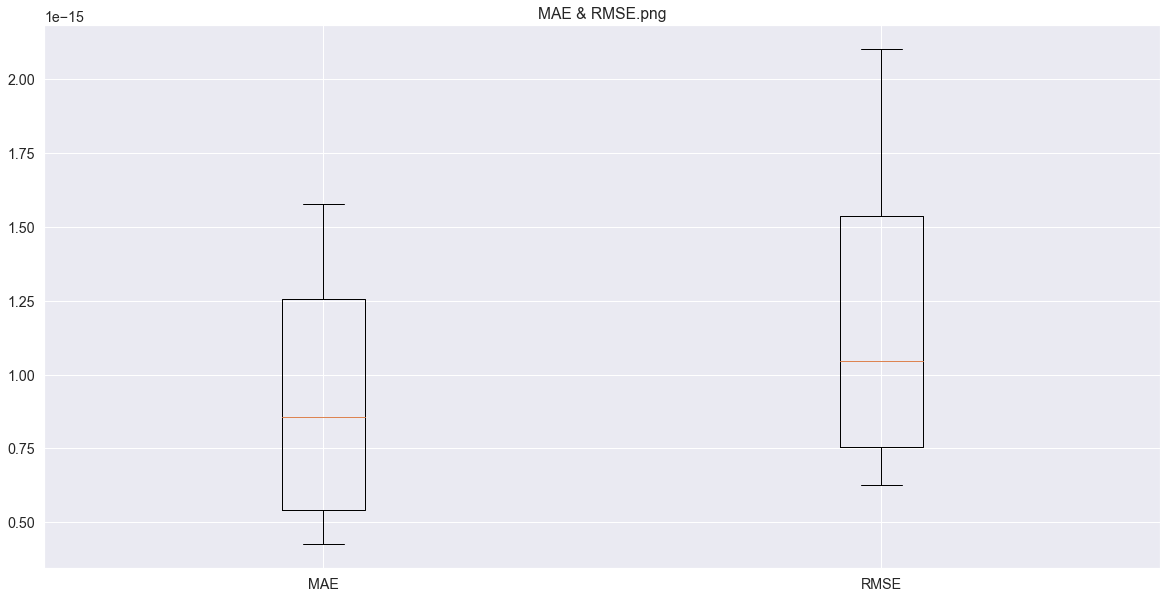

In [72]:
# mae_score & rmse_score boxplot
plt.boxplot([mae_score, rmse_score], labels=["MAE", "RMSE"])
plt.title("MAE & RMSE.png")
plt.savefig("MAE & RMSE.png")
plt.show()

RMSE gives a relatively high weight to large errors.

Mean Absolute Error (MAE): MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight. [1]

As It can be seen, the RMSE is higher than MAE, because RMSE is relatively high weigh to large errors, given that the error are squared before they are averaged. So, RMSE can be useful when large errors are undesirable.


### 2. Multiple Linear Regression with Regularization: Lasso

In [73]:
# Lasso regression
linear_regression_lasso = Lasso(alpha = 0.3, max_iter = 10000)
linear_regression_lasso.fit(data_train, target_train)

# Predictions
y_pred1 = linear_regression_lasso.predict(data_test)

#### Model Evaluation

In [74]:
# Mean Square Error
MSE_sklearn = mean_squared_error(target_test, y_pred1)

# RMSE
RMSE = np.sqrt(MSE_sklearn)

# R2
R2_sklearn = r2_score(target_test, y_pred1)

# mae
MAE_sklearn = mae(target_test, y_pred1)

print("MSE_sklearn = {:.3f}".format(MSE_sklearn))
print("MAE_sklearn = {:.3f}".format(MAE_sklearn))
print("RMSE_sklearn = {:.3f}".format(RMSE))
print("R2_sklearn = {:.3f}".format(R2_sklearn))

MSE_sklearn = 2.199
MAE_sklearn = 1.203
RMSE_sklearn = 1.483
R2_sklearn = -0.001


### 3. Multiple Linear Regression with Regularization: Ridge

In [75]:
# Ridge Regression
linear_regression_ridge = Ridge(alpha = 0.3)
linear_regression_ridge.fit(data_train, target_train)

# Predictions
y_pred2 = linear_regression_ridge.predict(data_test)

#### Model Evaluation

In [76]:
# Mean Square Error
MSE_sklearn = mean_squared_error(target_test, y_pred2)

# RMSE
RMSE = np.sqrt(MSE_sklearn)

# R2
R2_sklearn = r2_score(target_test, y_pred2)

# mae
MAE_sklearn = mae(target_test, y_pred2)

print("MSE_sklearn = {:.3f}".format(MSE_sklearn))
print("MAE_sklearn = {:.3f}".format(MAE_sklearn))
print("RMSE_sklearn = {:.3f}".format(RMSE))
print("R2_sklearn = {:.3f}".format(R2_sklearn))

MSE_sklearn = 2.238
MAE_sklearn = 1.211
RMSE_sklearn = 1.496
R2_sklearn = -0.018


###  4. Multiple Linear Regression with Regularization: ElasticNet Regression

In [77]:
# ElasticNet
linear_regression_elastic = ElasticNet(alpha = 0.3, max_iter = 10000)
linear_regression_elastic.fit(data_train, target_train)

# Predictions
y_pred3 = linear_regression_elastic.predict(data_test)

#### Model Evaluation

In [78]:
# Mean Square Error
MSE_sklearn = mean_squared_error(target_test, y_pred3)

# RMSE
RMSE = np.sqrt(MSE_sklearn)

# R2
R2_sklearn = r2_score(target_test, y_pred3)

# mae
MAE_sklearn = mae(target_test, y_pred3)

print("MSE_sklearn = {:.3f}".format(MSE_sklearn))
print("MAE_sklearn = {:.3f}".format(MAE_sklearn))
print("RMSE_sklearn = {:.3f}".format(RMSE))
print("R2_sklearn = {:.3f}".format(R2_sklearn))

MSE_sklearn = 2.199
MAE_sklearn = 1.203
RMSE_sklearn = 1.483
R2_sklearn = -0.001


### References
[1] Wesner. J. MAE and RMSE — Which Metric is Better? Medium. https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d